ROW/COL:  0 0
scale:  -5766.966685560049 5766.966685560049
ROW/COL:  2 0
ROW/COL:  0 1
ROW/COL:  2 1
ROW/COL:  0 2
ROW/COL:  2 2
scale:  -1330.981851115613 1330.981851115613
ROW/COL:  0 3
ROW/COL:  2 3
scale:  -2980.3451077891787 2980.3451077891787


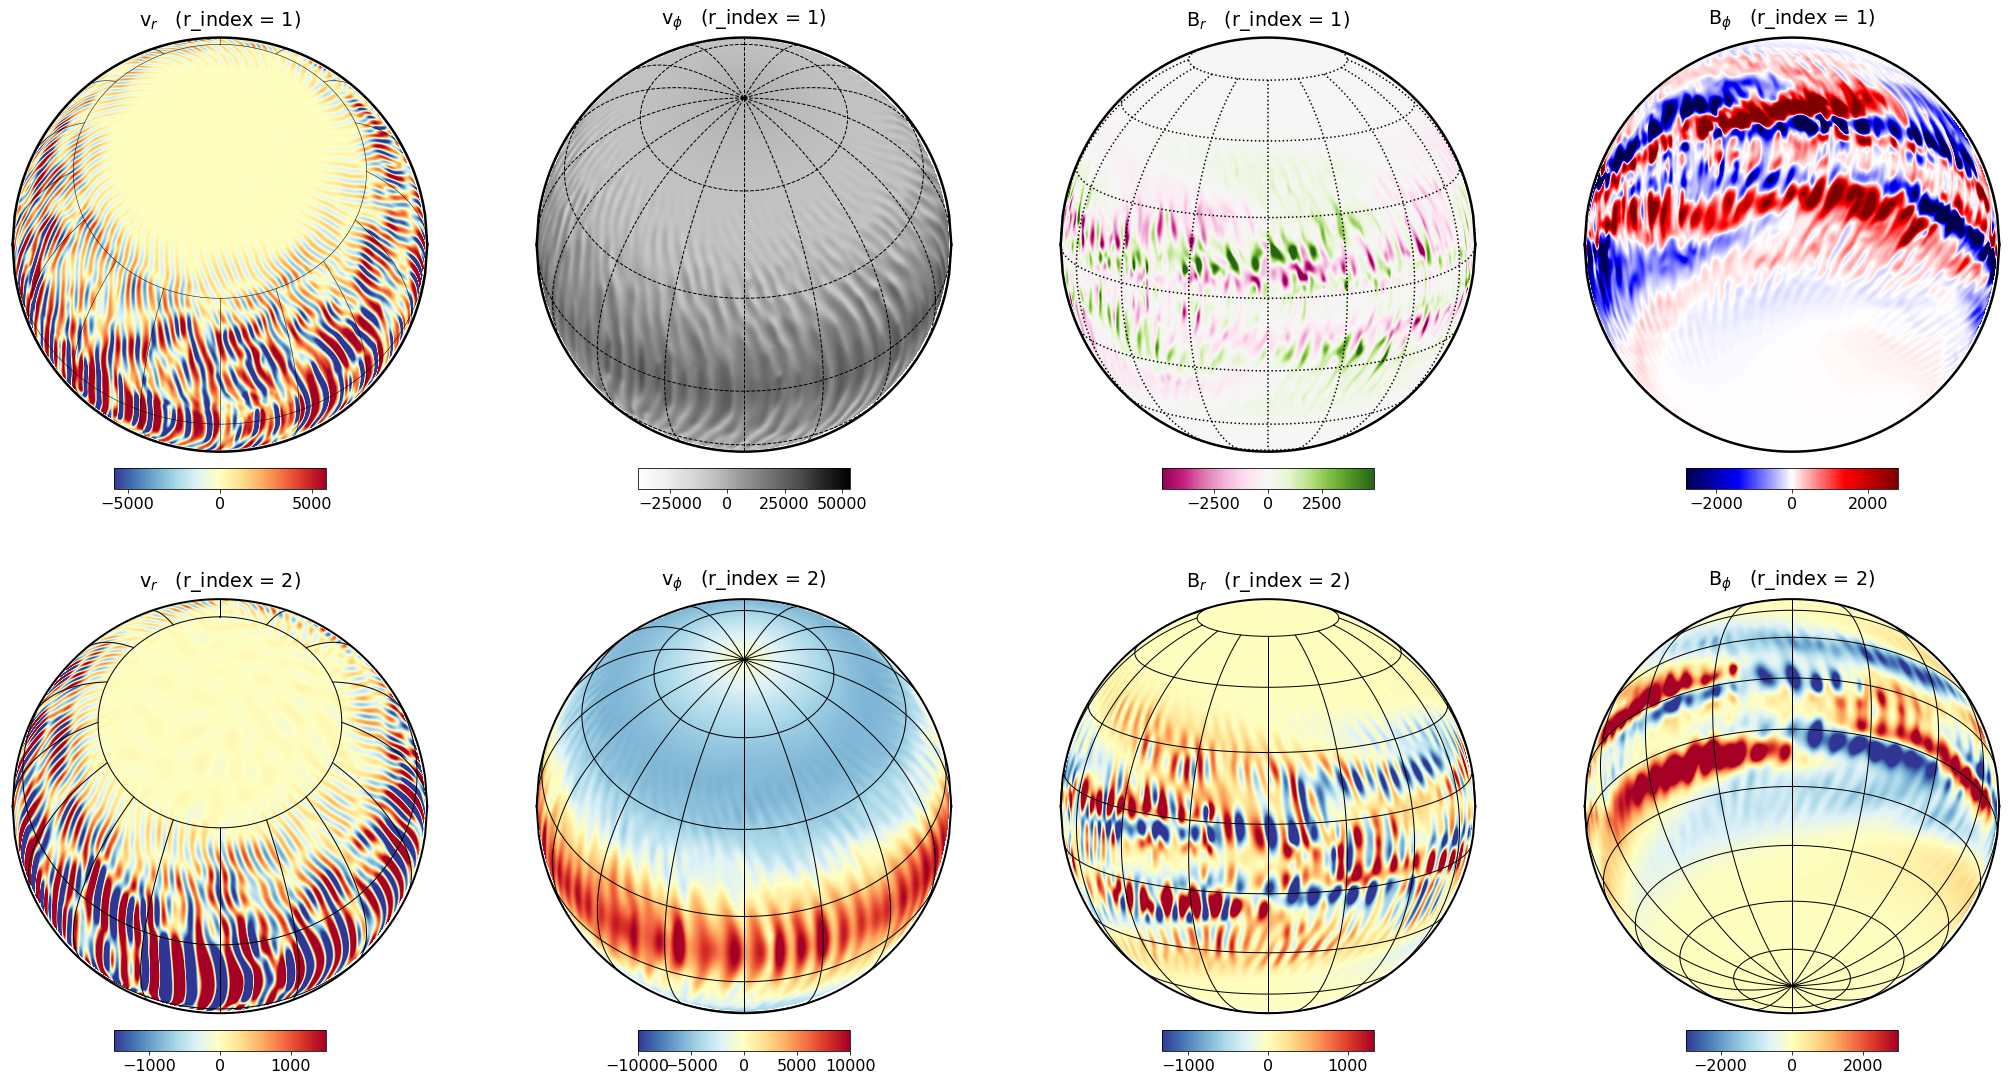

In [1]:
import numpy
import matplotlib.pyplot as plt
from matplotlib import gridspec
from rayleigh_diagnostics import Shell_Slices
from projection import plot_ortho

# This plots various data from a single shell_slice file.
# 8 diferent plots in 2 rows and 4 columns are created.
# It's easy to hack this to work with multiple files

s1=Shell_Slices('15600000')
data = numpy.zeros((s1.nphi,s1.ntheta),dtype='float64')
costheta = s1.costheta
nrows=2
ncols=2
pltin = 9  # Size of each subimage in inches (will be square)



nrow=2
ncol=4

#We use gridspec to set up a grid.  We actually have nrow*2 rows, with every other
#row being a 'spacer' row that's 10% the height of the main rows.
#This was the simplest way I could come up with the have the color bars appear nicely.
fig = plt.figure(constrained_layout=False, figsize=(pltin*ncol,pltin*nrow*1.1))
spec = gridspec.GridSpec(ncols=ncol, nrows=nrow*2, figure=fig, height_ratios=[1,.1]*nrow, width_ratios=[1]*ncol)



plt.rcParams.update({'font.size': 16})
qi =  [1,3, 801, 803]
nm = [r'v$_r$', r'v$_\phi$', r'B$_r$', r'B$_\phi$' ]

qinds = [qi, qi]  # Quantity codes to plot
names = [nm, nm]  # Names for labeling

lv = [[1]*ncol , [2]*ncol]  # Shell levels to plot (top row is level 1, bottom row is level 2)


style1=['-','--',':','-.']
style2=['-', '-', '-', '-']
styles = [style1, style2]  # Line style of grid lines

gwidth1=[0.5 , 1 , 1.5 , 2] 
gwidth2=[1,1,1,1]
gwidths = [gwidth1, gwidth2] # width of grid lines for each image (Default: True)

hwidths1=[2.5,2.5,2.5,2.5]  # Width of the horizon line or each image (Default: 2)
hwidths2=[2,2,2,2]
hwidths=[hwidths1,hwidths2]

cmaps1 = ["RdYlBu_r", "Greys", 'PiYG', 'seismic']  # A color table for each image (Default: RdYlBu_r)
cmaps2 = ["RdYlBu_r"]*4
cmaps = [cmaps1, cmaps2]

pgrids1 = [True, True, True, False] 
pgrids2 = [True, True, True, True]
pgrids  = [pgrids1, pgrids2] # Plot grids, or not for each image (Default: True)

latcens1 = [60, 45, 15, -30]
latcens = [latcens1, latcens1]   # Latitudinal center of vantage point (Default: 45 N)

loncens1 = [0,0,0,0]
loncens2 = [30,30,30,30]  # Longitudinal center of vantage point (Default: 0)
loncens = [loncens1,loncens2]

##########################################################
# If the grid is plotted, the number of latitude lines
# for the grid can be controlled via the nlats keyword.
# Default: 9
# Note that if nlats is even, the equator will not be drawn
nlats1 = [3,5,7,9]
nlats2 = [4,6,8,10]
nlats = [nlats1, nlats2]

##############################################################################
# Similarly, the nlons keyword can be used to control longitude lines
# More precisely, it controls the number of MERIDIANS (great circles) drawn
# Default:  8
nlons1 = [4,8,12,8]
nlons2 = [4,12,16,2]
nlons = [nlons1,nlons2]

#Longitude grid-lines can be drawn in one of two ways:
# 1)  Completely to the pole (polar_style = 'polar')
# 2)  Truncated at the last line of latitue drawn (polar_style = 'truncated')
# Default:  "truncated"
pstyle1 = ['truncated', 'polar', 'truncated', 'polar']
pstyle = [pstyle1, pstyle1]


##############################################################
# We can also control the way in which the image is saturated
# via the scale_type keyword.   There are three possibilities:
# 1) scale_type=['rms', a], where a is of type 'float'
#    In this instance, the image bounds are -a*rms(data), +a*rms(data)
# 2) scale_type = ['abs', a]
#    In this instance, the image bounds are -a*abs(data), +a*abs(data)
# 3) scale_type= ['force', [a,b]]
#    In this instance, the image bounds are a,b
# 4) scale_type = [None,None]
#    In this instance, the image bounds are min(image), max(image)
# Default:  [None,None]
# Note that rms and abs are taken over projected image values, not input data
# (you only see half the data in the image)

scale_type1 = [['rms',2.0 ], [None,None], ['abs', 0.5], ['abs', 0.2]]
scale_type2 = [['force', [-1500,1500]], ['force',[-10000,10000]], ['rms',2.5],['rms',2.5]]
scale_types = [scale_type1, scale_type2]

# Number of pixels across each projected, interpolated image
# 768 is the default and seems to do a reasonable job
nyzi = 768



for j in range(ncol):
    for i in range(nrow):
        
        data[:,:] = s1.vals[:,:,lv[i][j],s1.lut[qinds[i][j]],0]    

        row_ind = 2*i # skip over space allowed for color bars
        col_ind = j

        print("ROW/COL: ", row_ind, col_ind)
        ax    = fig.add_subplot(spec[row_ind,col_ind])
        cspec = spec[row_ind+1,col_ind]
        caxis=None

        plot_ortho(data,s1.costheta,fig,ax,caxis, hwidth=hwidths[i][j], gridstyle=styles[i][j], 
                   gridwidth=gwidths[i][j], nyz=nyzi, colormap=cmaps[i][j], 
                   plot_grid=pgrids[i][j], latcen=latcens[i][j], loncen= loncens[i][j],
                   pole_style=pstyle[i][j], nlats = nlats[i][j],scale_type=scale_types[i][j])
        ptitle=names[i][j]+"   (r_index = "+str(lv[i][j])+")"
        ax.set_title(ptitle)


#plt.tight_layout()
#plt.show()
plt.savefig('flows.pdf')